## Neural Best Buddies

I built this jupyter notebook to see how the working of the NBB features on jupyter.


For this purpose, the code has been slightly altered to suppress saving - now is an option, and output arrays of data to memory.


Utilization of bestbuddies for face mapping is not its most valid use. I just happened to be working with images from LFW database. 

In [1]:
import nbb
from nbb.options import Options
from nbb.util import draw_correspondence as draw
import math
import matplotlib.pyplot as plt
import os.path as osp

In [2]:
%%time
imgroot = ''
da = osp.join(imgroot,'Jade_Jagger_0001.jpg')
db = osp.join(imgroot,'Jacqueline_Marris_0001.jpg')
name='jadejacq'
k_final=20
# if results_dir is None: 
#    Dont save images to folder, output np arrays instead
o = Options()
o.setoptions(da, db, name=name, k_final=20, results_dir=None)
nbbs = nbb.run_files(o.opt)
#run files but show nothing, dont save images

imageSize 224
gpu_ids [0]
tau 0.05
border_size 7
input_nc 3
batchSize 1
k_per_level 1000
k_final 10
fast False
name experiment_name
results_dir ../results
save_path None
niter_decay 100
beta1 0.5
lr 0.05
gamma 1
convergence_threshold 0.001
resized to fit VGG
resized to fit VGG
Starting algorithm...
0 5
Finding best-buddies for the 5-th level
Drawing correspondence...
Finding best-buddies for the 4-th level
Drawing correspondence...
Finding best-buddies for the 3-th level
Drawing correspondence...
Finding best-buddies for the 2-th level
Drawing correspondence...
Finding best-buddies for the 1-th level
No. of correspondence:  322
Calculating K-means...
Done.
CPU times: user 4min 34s, sys: 18.7 s, total: 4min 53s
Wall time: 4min 53s


In [4]:
A_marked, B_marked = draw.draw_correspondence(nbbs.A, nbbs.B, nbbs.correspondences, nbbs.draw_radius[-1], None)
clustered = nbbs.top_k_in_clusters(nbbs.correspondences, 20)

Ak, Bk = draw.draw_correspondence(nbbs.A, nbbs.B, clustered, nbbs.draw_radius[-1], None)

Calculating K-means...
Done.


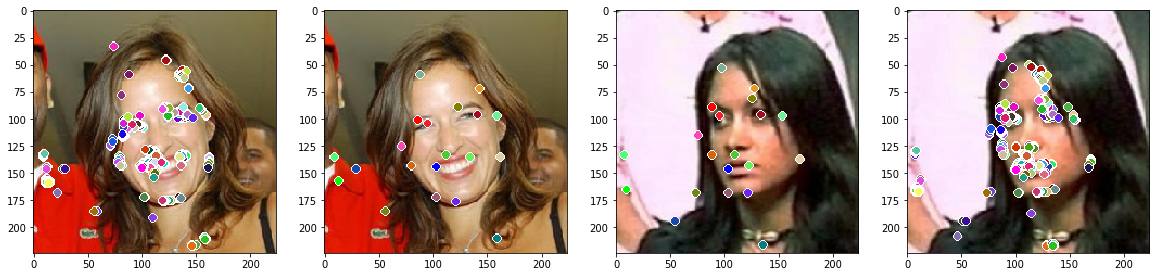

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.imshow(A_marked)
plt.subplot(142)
plt.imshow(Ak)
plt.subplot(143)
plt.imshow(Bk)
plt.subplot(144)
plt.imshow(B_marked)
plt.show()

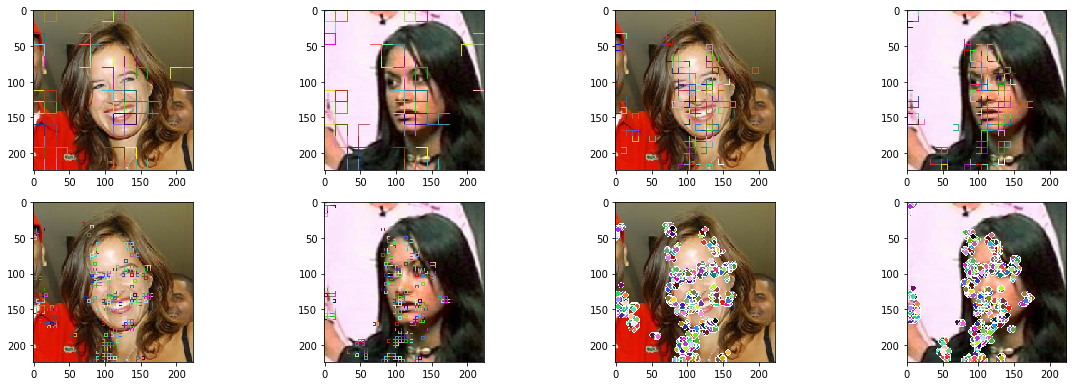

In [14]:
plt.figure(figsize=(20,10))
for i, c in enumerate(nbbs.intermediate_images):
    plt.subplot(3,4,i*2+1)
    plt.imshow(c[0])#inv_scale_image(c[0],5-i))
    plt.subplot(3,4,i*2+2)
    plt.imshow(c[1])#inv_scale_image(c[1],5-i))
plt.show()